In [1]:
%env KERAS_BACKEND=tensorflow 
#魔術指令，設定環境變數

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist 
#mnist為手寫數字圖庫，內含六萬筆train與一萬筆test資料

Using TensorFlow backend.


In [4]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data() #取得資料

In [5]:
len(x_train) #確認筆數

60000

In [6]:
x_train[9000].shape #確認矩陣大小

(28, 28)

In [7]:
x_train[9000] #0~255，0為白，255為黑

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41, 239, 253, 253, 253,
        174,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 175, 251, 251, 251, 251,
        173,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

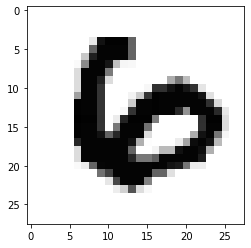

In [8]:
plt.imshow(x_train[9000],cmap = "Greys") #灰階畫圖

In [9]:
y_train[9000] #確認答案

6

In [10]:
x_train.shape #六萬筆28*28的資料

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(60000 , 784) #將資料重朔成60000*784的資料
x_test = x_test.reshape(10000 , 784) #同上，將資料拉平

In [12]:
from keras.utils import np_utils #要做 "1-hot enconding"，先匯入工具

In [13]:
y_train = np_utils.to_categorical(y_train , 10) #把0~9換成"1-hot enconding"的輸出

In [14]:
y_test = np_utils.to_categorical(y_test,10) #同上

In [15]:
y_train[9000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential #匯入神經網路模型，最標準型
from keras.layers import Dense , Activation #Dense是fullycinnectNN最標準的神經網路模型,也要設定Activation fun
from keras.optimizers import SGD #optimizers用以最佳化神經網路，SGD(隨機梯度下降)

In [17]:
model = Sequential() #建造一個空的神經網路

In [18]:
model.add( Dense( 500 , input_dim = 784 ) ) #第一層神經網路隱藏層，Dense = fiilyconnected , 第一層要記得加input_dim
model.add( Activation("sigmoid")) #Activation設定為sigmoid fun

In [19]:
model.add(Dense(500))  #第二層隱藏層
model.add( Activation("sigmoid"))

In [20]:
model.add(Dense(10))  #輸出層
model.add( Activation("softmax")) #設定為softmax(輸出總合為1)

In [21]:
model.compile(loss = "mse" , optimizer = SGD(lr = 0.1) ,metrics = ["accuracy"])
#組裝神經網路，須告知loss fun,mse=平方誤差總和，lr=學習率，metrics可輸入想看的數值(accuracy =正確率

In [22]:
model.summary() #模型預覽，392500=784*500+500，250500=500*500+500，5010=500*10+10，輸入*神經元數+bias數(同神經元數)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [23]:
model.fit(x_train , y_train , batch_size= 100, epochs = 20 )
#不會一次用60000筆，會一次用mini batch來訓練 , epochs=訓練次數


Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0822 - accuracy: 0.3534
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0621 - accuracy: 0.6344
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0443 - accuracy: 0.7821
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0321 - accuracy: 0.8504
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0250 - accuracy: 0.8763
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0209 - accuracy: 0.8901
Epoch 7/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0184 - accuracy: 0.8993
Epoch 8/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0167 - accuracy: 0.9055
Epoch 9/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0154 - accuracy: 0.9114
Epoch 10/20
60000/60000 [=============================

In [24]:
from ipywidgets import interact_manual #展示訓練成果(匯入互動模組)

In [25]:
predict=model.predict_classes(x_test) #用測試資料做預測(顯示羅馬數字)

In [26]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap = "Greys")
    print("神經網路判斷為：" , predict[測試編號])

In [27]:
interact_manual(test,測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [28]:
model_json = model.to_json() #儲存訓練好的神經網路
open("handwriting_model_architecture.json","w").write(model_json) #儲存神經網路架構寫入json檔
model.save_weights("handwriting_model_weights.h5") #儲存權重

In [29]:
#再次讀取方法github = https://github.com/yenlung/Deep-Learning-MOOC